In [1]:
import pandas as pd # Data processing
import numpy as np # Linear Algebra
import string # Operations on Strings
import spacy # Language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
import seaborn as sns


In [2]:
tweets  = pd.read_csv("Elon_musk.csv", encoding = 'Latin-1')
tweets

Unnamed: 0                                               Text
0              1                             @kunalb11 Im an alien
1              2  @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2              3                @joerogan @Spotify Great interview!
3              4                    @gtera27 Doge is underestimated
4              5  @teslacn Congratulations Tesla China for amazi...
...          ...                                                ...
1994        1995  @flcnhvy True, it sounds so surreal, but the n...
1995        1996  @PPathole Make sure to read ur terms &amp; con...
1996        1997                @TeslaGong @PPathole Samwise Gamgee
1997        1998  @PPathole Altho Dumb and Dumber is <U+0001F525...
1998        1999                          Progress update August 28

[1999 rows x 2 columns]

In [3]:
# We dont need Unnamed Column so we will drop it
tweets.drop(['Unnamed: 0'], axis=1, inplace=True)
tweets

Text
0                                @kunalb11 Im an alien
1     @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                   @joerogan @Spotify Great interview!
3                       @gtera27 Doge is underestimated
4     @teslacn Congratulations Tesla China for amazi...
...                                                 ...
1994  @flcnhvy True, it sounds so surreal, but the n...
1995  @PPathole Make sure to read ur terms &amp; con...
1996                @TeslaGong @PPathole Samwise Gamgee
1997  @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                          Progress update August 28

[1999 rows x 1 columns]

In [4]:
tweets.shape

(1999, 1)

In [5]:
tweets.size

1999

In [6]:
len(tweets)

1999

# Text Preprocessing 

In [7]:
tweets = [x.strip() for x in tweets.Text]  #removing leading and trailing spaces
tweets

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [8]:
tweets = [x for x in tweets if x] # removes empty strings
tweets

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [9]:
#Joining Strings/Texts
tweets_text = ' '.join(tweets)
tweets_text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [10]:
# Removing tweeter usernames as they wont be of any use for us
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(strip_handles=True)
tweets_tokens = tknzr.tokenize(tweets_text)
print(tweets_tokens)

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', 'Great', 'interview', '!', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', '!', '!', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', '!', 'https://t.co/9WFKMYu2oj', 'Frodo', 'was', 'the', 'underdoge', ',', 'All', 'thought', 'he', 'would', 'fail', ',', 'Himself', 'most', 'of', 'all', '.', 'https://t.co/zGxJFDzzrM', 'Haha', 'thanks', ':)', 'Indeed', '!', 'Tweets', 'definitely', 'do', 'not', 'represent', 'real-world', 'time', 'allocation', '.', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'https://t.co/3rWE9uHSTS', 'It', '\x92', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', ',', 'so', 'he', 'can'

In [11]:
#Again joining tweets into one single string
text = ' '.join(tweets_tokens)
text

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is next-level . Have you tried it ? Great interview ! Doge is underestimated Congratulations Tesla China for amazing execution last year . Now on to the next for even more ! ! Happy New Year of the Ox ! https://t.co/9WFKMYu2oj Frodo was the underdoge , All thought he would fail , Himself most of all . https://t.co/zGxJFDzzrM Haha thanks :) Indeed ! Tweets definitely do not represent real-world time allocation . The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with https://t.co/3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X , so he can be a toddler hodler He definitely has issues , but the sentencing seems a bit high Thanks for fixing Please unlock my account <U+0001F923> <U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT : NASA has selected Falcon Heavy to 

In [12]:
no_punc_text = text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox  httpstco9WFKMYu2oj Frodo was the underdoge  All thought he would fail  Himself most of all  httpstcozGxJFDzzrM Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with httpstco3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha httpstcoFc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Ga

In [13]:
#removing http links
import re
no_url_text = re.sub(r'http\S+','', no_punc_text)
no_url_text

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox   Frodo was the underdoge  All thought he would fail  Himself most of all   Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with  It \x92 s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha  Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission   Yes Once we can predict cash flow reason

In [14]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Yadnyeshwar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
#Tokenization
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_url_text)
print(text_tokens[0:50])

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'Great', 'interview', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'Frodo', 'was', 'the', 'underdoge', 'All', 'thought']


In [16]:
len(text_tokens)

17847

In [17]:
#Normalizing the tokens by making all lower case
lower_words = [x.lower() for x in text_tokens]
print(lower_words[100:200])

['a', 'toddler', 'hodler', 'he', 'definitely', 'has', 'issues', 'but', 'the', 'sentencing', 'seems', 'a', 'bit', 'high', 'thanks', 'for', 'fixing', 'please', 'unlock', 'my', 'account', 'u0001f923', 'u0001f923', 'this', 'is', 'true', 'power', 'haha', 'any', 'crypto', 'wallet', 'that', 'won', '\x92', 't', 'give', 'you', 'your', 'private', 'keys', 'should', 'be', 'avoided', 'at', 'all', 'costs', 'your', 'app', 'sucks', 'rt', 'nasa', 'has', 'selected', 'falcon', 'heavy', 'to', 'launch', 'the', 'first', 'two', 'elements', 'of', 'the', 'lunar', 'gateway', 'together', 'on', 'one', 'mission', 'yes', 'once', 'we', 'can', 'predict', 'cash', 'flow', 'reasonably', 'well', 'starlink', 'will', 'ipo', 'starlink', 'is', 'a', 'staggeringly', 'difficult', 'technical', 'economic', 'endeavor', 'however', 'if', 'we', 'don', 'spacex', 'needs', 'to', 'pass', 'through', 'a', 'deep']


In [18]:
#removing stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yadnyeshwar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
my_stop_words = stopwords.words('english')
my_stop_words 

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [20]:
no_stop_tokens = [word for word in lower_words if not word in my_stop_words]
print(no_stop_tokens[0:100])

['\x92', 'alien', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'tried', 'great', 'interview', 'doge', 'underestimated', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'thought', 'would', 'fail', 'haha', 'thanks', 'indeed', 'tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'entertaining', 'outcome', 'likely', 'sent', 'agree', 'clubhouse', '\x92', 'getting', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'thanks', 'fixing', 'please', 'unlock', 'account', 'u0001f923', 'u0001f923', 'true', 'power', 'haha', 'crypto', 'wallet', '\x92', 'give', 'private', 'keys', 'avoided', 'costs', 'app', 'sucks', 'rt', 'nasa', 'selected', 'falcon', 'heavy', 'launch', 'first', 'two', 'elements', 'lunar', 'gateway', 'together', 'one', 'mission', 'yes', 'predict', 'cash', 'flow', 'reasonably', 'well']


In [21]:
len(no_stop_tokens)

11075

In [22]:
pd.Series(no_stop_tokens).value_counts()

             302
rt            127
tesla          96
yes            86
u0001f923      77
             ... 
attractive      1
employers       1
students        1
cape            1
altho           1
Length: 3918, dtype: int64

In [23]:
print(pd.Series(no_stop_tokens).value_counts()[0:15])

            302
rt           127
tesla         96
yes           86
u0001f923     77
great         76
haha          55
good          51
launch        49
sure          43
yeah          41
would         41
much          40
dragon        39
first         39
dtype: int64


In [24]:
#We can see that their are some words with no meanings so we will add them in the stopwords and again make new no stopwords list
sw_list = ['\x92','rt','yes','u0001f923','haha','yeah']
my_stop_words.extend(sw_list)

In [25]:
no_stop_tokens = [x for x in lower_words if not x in my_stop_words]
print(no_stop_tokens[0:100])

['alien', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'tried', 'great', 'interview', 'doge', 'underestimated', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'thought', 'would', 'fail', 'thanks', 'indeed', 'tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'entertaining', 'outcome', 'likely', 'sent', 'agree', 'clubhouse', 'getting', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'thanks', 'fixing', 'please', 'unlock', 'account', 'true', 'power', 'crypto', 'wallet', 'give', 'private', 'keys', 'avoided', 'costs', 'app', 'sucks', 'nasa', 'selected', 'falcon', 'heavy', 'launch', 'first', 'two', 'elements', 'lunar', 'gateway', 'together', 'one', 'mission', 'predict', 'cash', 'flow', 'reasonably', 'well', 'starlink', 'ipo', 'starlink', 'staggeringly', 'difficult', 'technical', 'economic', 'e

In [26]:
len(no_stop_tokens)

10387

In [27]:
pd.Series(no_stop_tokens).value_counts()

tesla         96
great         76
good          51
launch        49
sure          43
              ..
attractive     1
employers      1
students       1
cape           1
altho          1
Length: 3912, dtype: int64

In [28]:
clean_tweets = ' '.join(no_stop_tokens)
clean_tweets

'alien ray tracing cyberpunk hdr nextlevel tried great interview doge underestimated congratulations tesla china amazing execution last year next even happy new year ox frodo underdoge thought would fail thanks indeed tweets definitely represent realworld time allocation entertaining outcome likely sent agree clubhouse getting real bought dogecoin lil x toddler hodler definitely issues sentencing seems bit high thanks fixing please unlock account true power crypto wallet give private keys avoided costs app sucks nasa selected falcon heavy launch first two elements lunar gateway together one mission predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical economic endeavor however spacex needs pass deep chasm negative cash flow next year lowest cost per ton carbon sequestered net value product made must scalable g meant price countries difference taxes shipping intended earth may ideas apply mars xprize team manage 100m carbon capture prize everyone tesla

In [29]:
#Stemming
from nltk.stem import PorterStemmer

In [30]:
ps=PorterStemmer()

In [31]:
stemmed_tokens = [ps.stem(word) for word in no_stop_tokens]
print(stemmed_tokens[0:100])

['alien', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'tri', 'great', 'interview', 'doge', 'underestim', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'next', 'even', 'happi', 'new', 'year', 'ox', 'frodo', 'underdog', 'thought', 'would', 'fail', 'thank', 'inde', 'tweet', 'definit', 'repres', 'realworld', 'time', 'alloc', 'entertain', 'outcom', 'like', 'sent', 'agre', 'clubhous', 'get', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'definit', 'issu', 'sentenc', 'seem', 'bit', 'high', 'thank', 'fix', 'pleas', 'unlock', 'account', 'true', 'power', 'crypto', 'wallet', 'give', 'privat', 'key', 'avoid', 'cost', 'app', 'suck', 'nasa', 'select', 'falcon', 'heavi', 'launch', 'first', 'two', 'element', 'lunar', 'gateway', 'togeth', 'one', 'mission', 'predict', 'cash', 'flow', 'reason', 'well', 'starlink', 'ipo', 'starlink', 'staggeringli', 'difficult', 'technic', 'econom', 'endeavor', 'howev']


In [32]:
for w in no_stop_tokens:
    print(w,':',ps.stem(w))

alien : alien
ray : ray
tracing : trace
cyberpunk : cyberpunk
hdr : hdr
nextlevel : nextlevel
tried : tri
great : great
interview : interview
doge : doge
underestimated : underestim
congratulations : congratul
tesla : tesla
china : china
amazing : amaz
execution : execut
last : last
year : year
next : next
even : even
happy : happi
new : new
year : year
ox : ox
frodo : frodo
underdoge : underdog
thought : thought
would : would
fail : fail
thanks : thank
indeed : inde
tweets : tweet
definitely : definit
represent : repres
realworld : realworld
time : time
allocation : alloc
entertaining : entertain
outcome : outcom
likely : like
sent : sent
agree : agre
clubhouse : clubhous
getting : get
real : real
bought : bought
dogecoin : dogecoin
lil : lil
x : x
toddler : toddler
hodler : hodler
definitely : definit
issues : issu
sentencing : sentenc
seems : seem
bit : bit
high : high
thanks : thank
fixing : fix
please : pleas
unlock : unlock
account : account
true : true
power : power
crypto : cry

put : put
last : last
money : money
even : even
though : though
thought : thought
would : would
still : still
fail : fail
eithe : eith
funding : fund
round : round
completed : complet
6pm : 6pm
christmas : christma
eve : eve
2008 : 2008
last : last
hour : hour
last : last
day : day
possible : possibl
investo : investo
lowering : lower
starlink : starlink
terminal : termin
cost : cost
may : may
sound : sound
rather : rather
pedestrian : pedestrian
actually : actual
difficult : difficult
technical : technic
challenge : challeng
soon : soon
get : get
regulatory : regulatori
approval : approv
hopefully : hope
around : around
middle : middl
next : next
year : year
right : right
takes : take
5 : 5
mins : min
set : set
future : futur
improvements : improv
probably : probabl
less : less
3 : 3
mi : mi
canada : canada
norway : norway
next : next
get : get
us : us
early : earli
beta : beta
realize : realiz
possible : possibl
problem : problem
way : way
get : get
current : current
design : design


u0001f1fa : u0001f1fa
u0001f1f8 : u0001f1f8
returned : return
webcast : webcast
crew : crew
dragon : dragon
return : return
earth : earth
u2192 : u2192
h : h
good : good
splashdown : splashdown
dragon : dragon
confirmed : confirm
welcome : welcom
back : back
earth : earth
dragon : dragon
stable : stabl
water : water
acquisition : acquisit
signal : signal
expected : expect
5 : 5
mins : min
4 : 4
mins : min
dragon : dragon
loss : loss
signal : signal
due : due
atmospheric : atmospher
entry : entri
plasma : plasma
dragon : dragon
travel : travel
south : south
new : new
zealand : zealand
florida : florida
37 : 37
minutes : minut
coming : come
hot : hot
astronauts : astronaut
land : land
2 : 2
hours : hour
crew : crew
dragon : dragon
flight : flight
back : back
earth : earth
remains : remain
track : track
targeting : target
splashdown : splashdown
coast : coast
p : p
however : howev
prove : prove
superdraco : superdraco
landing : land
could : could
work : work
propulsive : propuls
hover : h

In [34]:
nlp = spacy.load('en_core_web_md')
doc = nlp(' '.join(stemmed_tokens))
print(doc[0:50])

alien ray trace cyberpunk hdr nextlevel tri great interview doge underestim congratul tesla china amaz execut last year next even happi new year ox frodo underdog thought would fail thank inde tweet definit repres realworld time alloc entertain outcom like sent agre clubhous get real bought dogecoin lil x toddler


In [35]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['alien', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'tri', 'great', 'interview', 'doge', 'underestim', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'next', 'even', 'happi', 'new', 'year', 'ox', 'frodo']


In [36]:
#Lemmatizing
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Yadnyeshwar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [37]:
for w in no_stop_tokens:
    print(w,':',lemmatizer.lemmatize(w))

alien : alien
ray : ray
tracing : tracing
cyberpunk : cyberpunk
hdr : hdr
nextlevel : nextlevel
tried : tried
great : great
interview : interview
doge : doge
underestimated : underestimated
congratulations : congratulation
tesla : tesla
china : china
amazing : amazing
execution : execution
last : last
year : year
next : next
even : even
happy : happy
new : new
year : year
ox : ox
frodo : frodo
underdoge : underdoge
thought : thought
would : would
fail : fail
thanks : thanks
indeed : indeed
tweets : tweet
definitely : definitely
represent : represent
realworld : realworld
time : time
allocation : allocation
entertaining : entertaining
outcome : outcome
likely : likely
sent : sent
agree : agree
clubhouse : clubhouse
getting : getting
real : real
bought : bought
dogecoin : dogecoin
lil : lil
x : x
toddler : toddler
hodler : hodler
definitely : definitely
issues : issue
sentencing : sentencing
seems : seems
bit : bit
high : high
thanks : thanks
fixing : fixing
please : please
unlock : unlo

In [38]:
from nltk.corpus import wordnet as wn 
from nltk import word_tokenize, pos_tag
from collections import defaultdict
tag_map = defaultdict(lambda : wn.NOUN)

In [39]:
lemma1 = []
for token, tag in pos_tag(no_stop_tokens):
    lemma = lemmatizer.lemmatize(token, tag_map[tag[0]])
    lemma1.append(lemma)
    print(token, '=>', lemma) 

alien => alien
ray => ray
tracing => tracing
cyberpunk => cyberpunk
hdr => hdr
nextlevel => nextlevel
tried => tried
great => great
interview => interview
doge => doge
underestimated => underestimated
congratulations => congratulation
tesla => tesla
china => china
amazing => amazing
execution => execution
last => last
year => year
next => next
even => even
happy => happy
new => new
year => year
ox => ox
frodo => frodo
underdoge => underdoge
thought => thought
would => would
fail => fail
thanks => thanks
indeed => indeed
tweets => tweet
definitely => definitely
represent => represent
realworld => realworld
time => time
allocation => allocation
entertaining => entertaining
outcome => outcome
likely => likely
sent => sent
agree => agree
clubhouse => clubhouse
getting => getting
real => real
bought => bought
dogecoin => dogecoin
lil => lil
x => x
toddler => toddler
hodler => hodler
definitely => definitely
issues => issue
sentencing => sentencing
seems => seems
bit => bit
high => high
than

In [40]:
lemma2 = ' '.join(lemma1)
lemma2

'alien ray tracing cyberpunk hdr nextlevel tried great interview doge underestimated congratulation tesla china amazing execution last year next even happy new year ox frodo underdoge thought would fail thanks indeed tweet definitely represent realworld time allocation entertaining outcome likely sent agree clubhouse getting real bought dogecoin lil x toddler hodler definitely issue sentencing seems bit high thanks fixing please unlock account true power crypto wallet give private key avoided cost app suck nasa selected falcon heavy launch first two element lunar gateway together one mission predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical economic endeavor however spacex need pas deep chasm negative cash flow next year lowest cost per ton carbon sequestered net value product made must scalable g meant price country difference tax shipping intended earth may idea apply mar xprize team manage 100m carbon capture prize everyone tesla receives stock

<b>Feature Extraction</b>

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(stemmed_tokens)

In [42]:
print(vectorizer.vocabulary_)

{'alien': 194, 'ray': 2172, 'trace': 2800, 'cyberpunk': 728, 'hdr': 1287, 'nextlevel': 1832, 'tri': 2817, 'great': 1236, 'interview': 1452, 'doge': 839, 'underestim': 2961, 'congratul': 643, 'tesla': 2720, 'china': 557, 'amaz': 214, 'execut': 992, 'last': 1532, 'year': 3161, 'next': 1831, 'even': 971, 'happi': 1270, 'new': 1829, 'ox': 1935, 'frodo': 1140, 'underdog': 2960, 'thought': 2745, 'would': 3147, 'fail': 1025, 'thank': 2728, 'inde': 1410, 'tweet': 2844, 'definit': 764, 'repres': 2228, 'realworld': 2185, 'time': 2761, 'alloc': 196, 'entertain': 944, 'outcom': 1915, 'like': 1583, 'sent': 2372, 'agre': 179, 'clubhous': 587, 'get': 1193, 'real': 2180, 'bought': 438, 'dogecoin': 841, 'lil': 1584, 'toddler': 2771, 'hodler': 1330, 'issu': 1469, 'sentenc': 2373, 'seem': 2360, 'bit': 399, 'high': 1318, 'fix': 1084, 'pleas': 2025, 'unlock': 2983, 'account': 143, 'true': 2826, 'power': 2057, 'crypto': 713, 'wallet': 3060, 'give': 1204, 'privat': 2089, 'key': 1502, 'avoid': 320, 'cost': 68

In [43]:
print(vectorizer.get_feature_names()[1:20])
print(x.toarray()[0:20])

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['005', '10', '100', '1000', '10000', '100m', '107', '10pm', '10x', '11', '12', '122m', '13', '130', '14', '140', '149', '15', '150']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [44]:
print(x.toarray().shape)

(10387, 3178)


In [45]:
x.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

<b>Lets try out bigrams and trigrams</b>

In [46]:
vectorizer_ngram = CountVectorizer(analyzer='word', ngram_range=(1,4), max_features=100)
bow_matrix_ngram = vectorizer_ngram.fit_transform(tweets)

In [47]:
print(vectorizer_ngram.get_feature_names())

['0001f923', '0001f923 0001f923', 'about', 'all', 'also', 'amp', 'an', 'and', 'are', 'as', 'at', 'be', 'but', 'by', 'can', 'cleantechnica', 'co', 'do', 'dragon', 'erdayastronaut', 'first', 'flcnhvy', 'for', 'from', 'good', 'great', 'haha', 'has', 'have', 'he', 'high', 'https', 'https co', 'id_aa_carmack', 'if', 'in', 'in the', 'is', 'it', 'just', 'kristennetten', 'launch', 'like', 'make', 'marcushousegame', 'more', 'most', 'much', 'my', 'nasa', 'nasaspaceflight', 'need', 'new', 'no', 'not', 'of', 'of the', 'on', 'one', 'or', 'our', 'out', 'people', 'ppathole', 'probably', 'rationaletienne', 're', 'rt', 'rt spacex', 'should', 'so', 'some', 'spacex', 'starship', 'sure', 'tesla', 'teslaownerssv', 'teslarati', 'than', 'that', 'the', 'there', 'they', 'this', 'this is', 'to', 'too', 'true', 'was', 'we', 'what', 'wholemarsblog', 'will', 'will be', 'with', 'would', 'yeah', 'year', 'yes', 'you']


In [48]:
print(bow_matrix_ngram.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


<b>TFidf Vectorizer</b>

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [50]:
tfidf_vectorizer = TfidfVectorizer(norm='l2', analyzer='word', ngram_range=(1,3), max_features=500)

In [51]:
tf_idf_matrix = tfidf_vectorizer.fit_transform(tweets)

In [52]:
print(tfidf_vectorizer.get_feature_names_out())

['0001f525' '0001f5a4' '0001f923' '0001f923 0001f923' '20' '28delayslater'
 '60' 'about' 'absolutely' 'accurate' 'actually' 'after' 'ai'
 'ajtourville' 'all' 'almost' 'also' 'although' 'am' 'amazing' 'amp' 'an'
 'and' 'any' 'appreciated' 'archillect' 'are' 'as' 'astro_doug'
 'astrobehnken' 'astrojordy' 'astronauts' 'at' 'at tesla'
 'austinbarnard45' 'autopilot' 'back' 'bad' 'bar' 'be' 'be great' 'been'
 'being' 'berlin' 'berniesanders' 'best' 'beta' 'better' 'between' 'big'
 'bit' 'boca' 'bocachicagal' 'body' 'booster' 'boringcompany' 'both'
 'build' 'but' 'but it' 'but we' 'by' 'c_bass3d' 'can' 'car' 'cargo'
 'cars' 'caspar_stanley' 'cleantechnica' 'close' 'co' 'come' 'coming'
 'coming soon' 'companies' 'confirmed' 'congratulations' 'cool' 'cost'
 'could' 'crew' 'crew dragon' 'data' 'day' 'days' 'definitely' 'design'
 'did' 'different' 'djsnm' 'do' 'doesn' 'doge' 'doing' 'dojo' 'don' 'done'
 'down' 'dragon' 'driving' 'droneship' 'early' 'earth' 'easy' 'electric'
 'energy' 'engine' 'en

In [53]:
print(tf_idf_matrix.toarray())

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.89309813 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


<b>Generate Wordcloud</b>

In [54]:
from wordcloud import WordCloud, STOPWORDS

In [55]:
#defining function for the plot
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off');

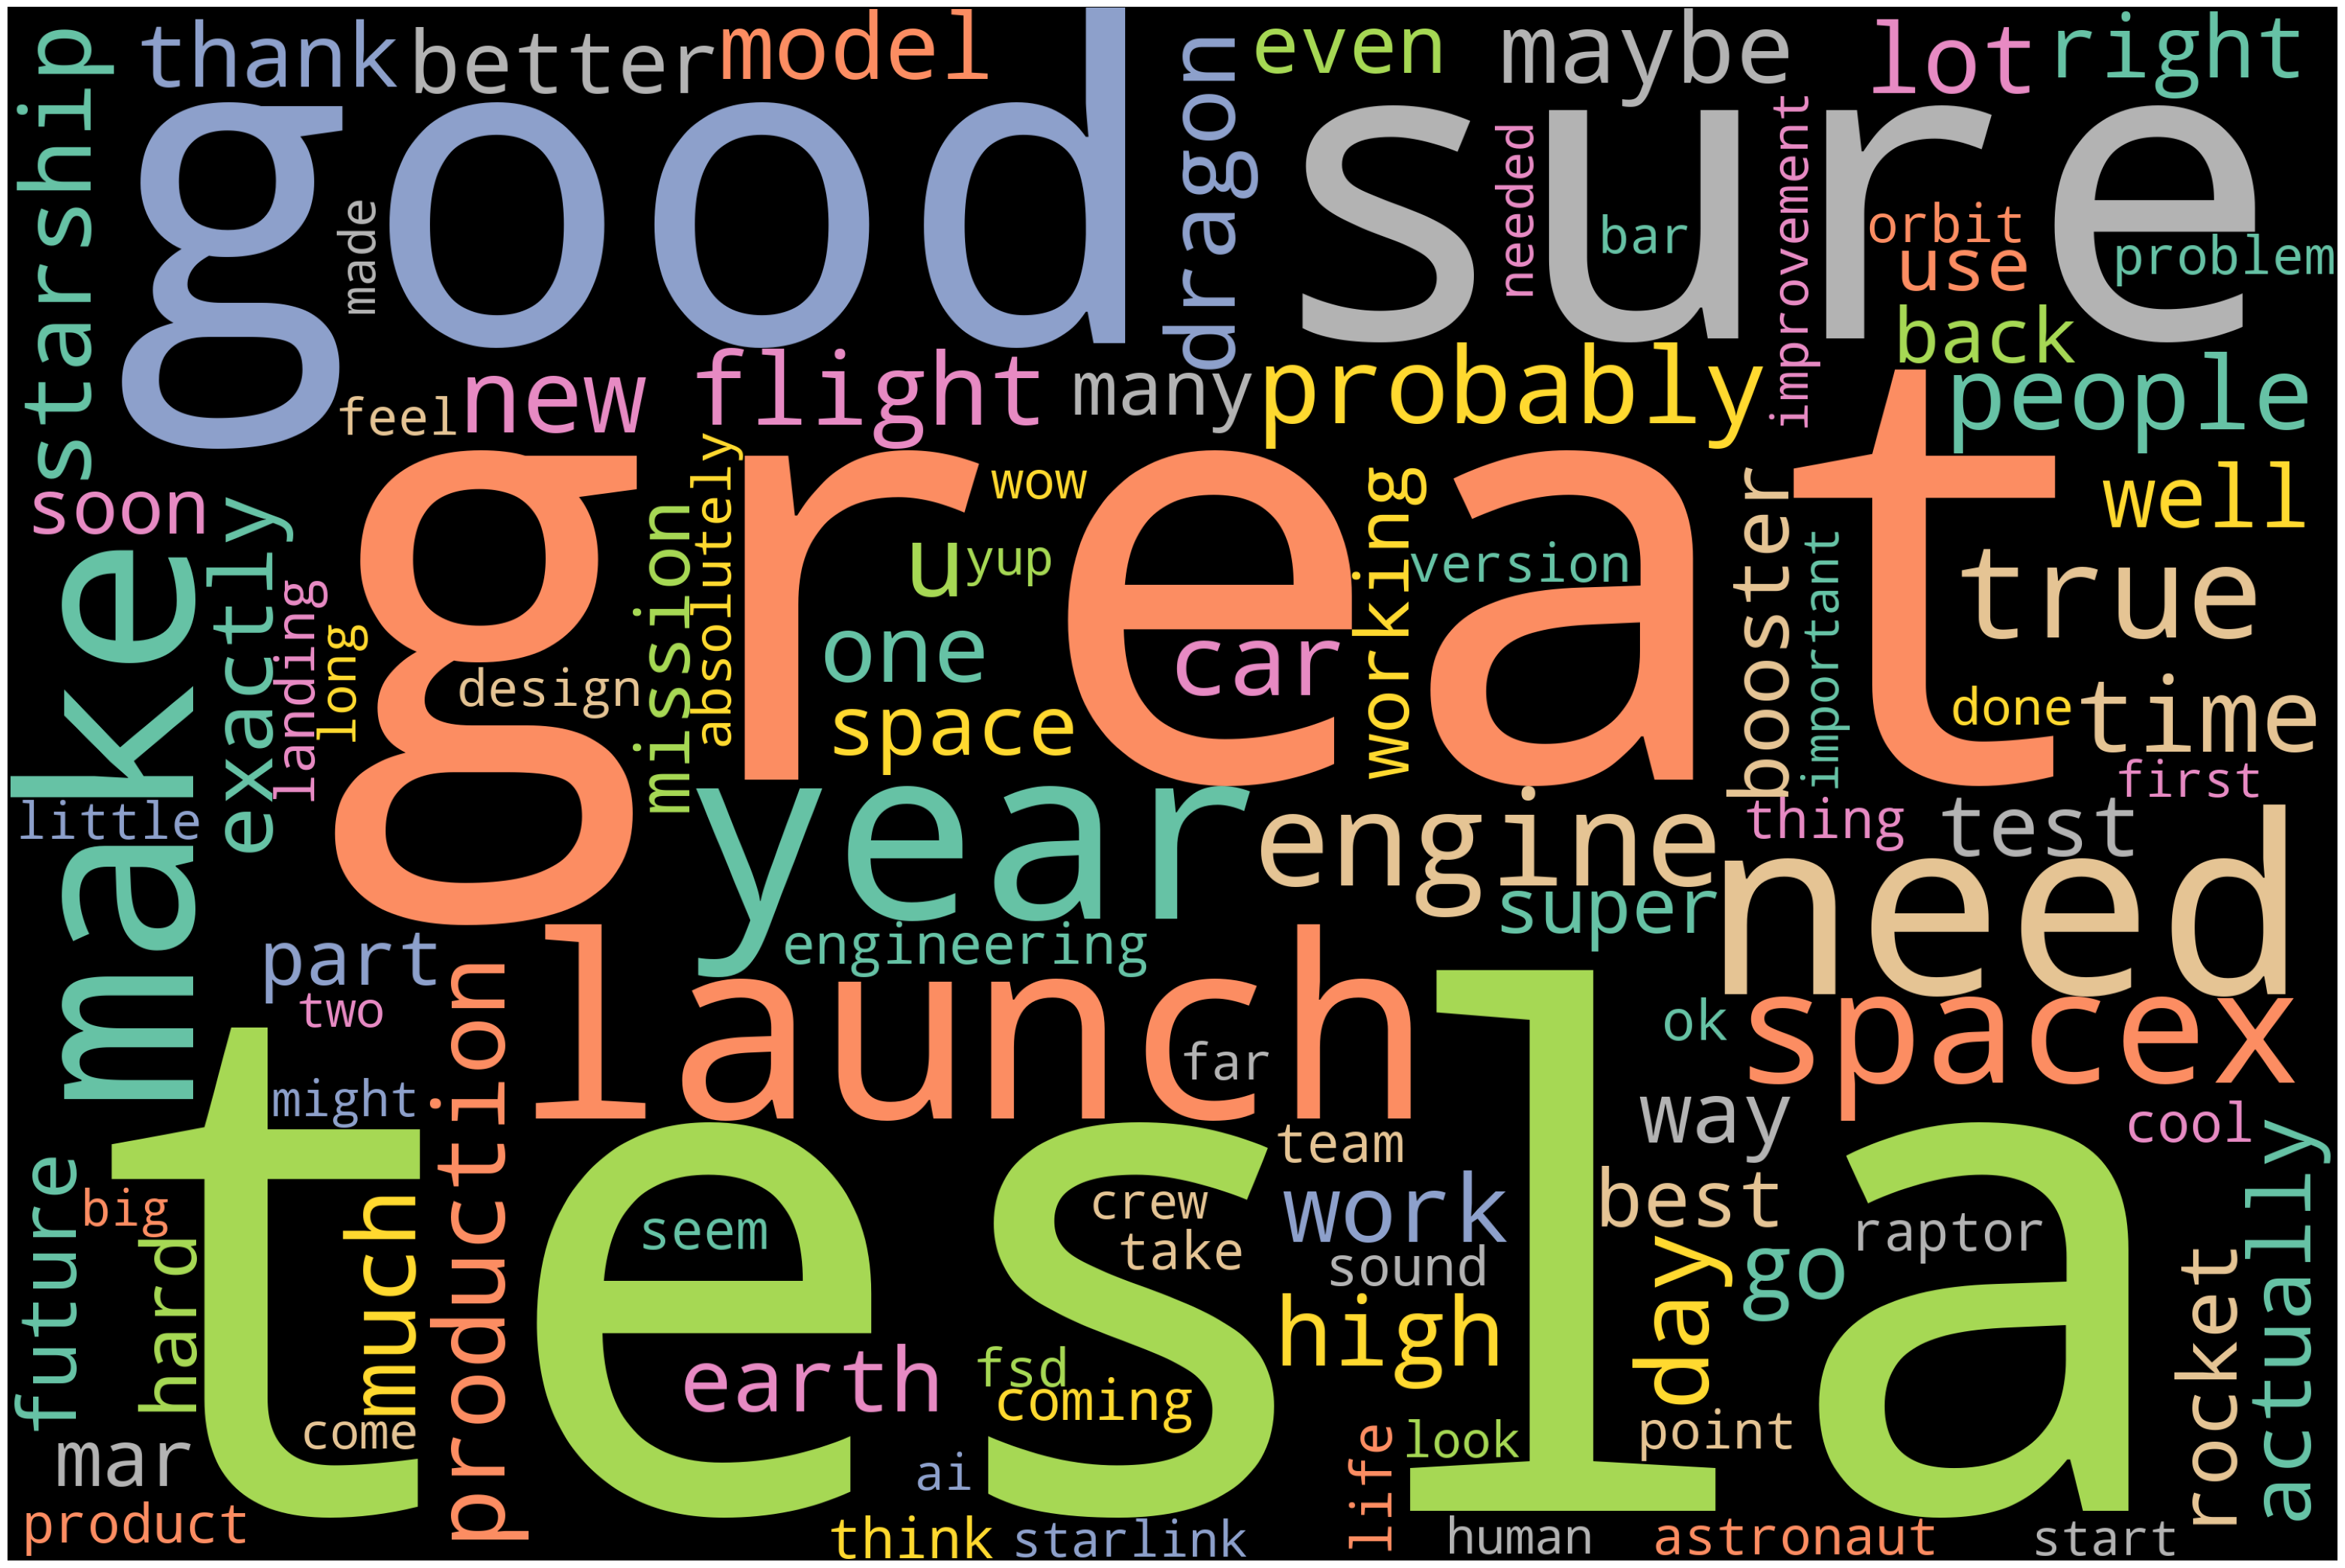

In [56]:
#Generating wordcloud


wordcloud = WordCloud(width = 3000, height=2000, background_color='black',max_words=100, 
                      colormap='Set2').generate(lemma2)

plot_cloud(wordcloud)

# Named Entity Recognition

In [57]:
npl = spacy.load('en_core_web_md')

one_block = clean_tweets
one_block

doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [58]:
one_block

'alien ray tracing cyberpunk hdr nextlevel tried great interview doge underestimated congratulations tesla china amazing execution last year next even happy new year ox frodo underdoge thought would fail thanks indeed tweets definitely represent realworld time allocation entertaining outcome likely sent agree clubhouse getting real bought dogecoin lil x toddler hodler definitely issues sentencing seems bit high thanks fixing please unlock account true power crypto wallet give private keys avoided costs app sucks nasa selected falcon heavy launch first two elements lunar gateway together one mission predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical economic endeavor however spacex needs pass deep chasm negative cash flow next year lowest cost per ton carbon sequestered net value product made must scalable g meant price countries difference taxes shipping intended earth may ideas apply mars xprize team manage 100m carbon capture prize everyone tesla

In [59]:
doc_block

alien ray tracing cyberpunk hdr nextlevel tried great interview doge underestimated congratulations tesla china amazing execution last year next even happy new year ox frodo underdoge thought would fail thanks indeed tweets definitely represent realworld time allocation entertaining outcome likely sent agree clubhouse getting real bought dogecoin lil x toddler hodler definitely issues sentencing seems bit high thanks fixing please unlock account true power crypto wallet give private keys avoided costs app sucks nasa selected falcon heavy launch first two elements lunar gateway together one mission predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical economic endeavor however spacex needs pass deep chasm negative cash flow next year lowest cost per ton carbon sequestered net value product made must scalable g meant price countries difference taxes shipping intended earth may ideas apply mars xprize team manage 100m carbon capture prize everyone tesla 

In [60]:
for token in doc_block:
    print(token, token.pos_)

alien PROPN
ray NOUN
tracing VERB
cyberpunk NOUN
hdr PROPN
nextlevel NOUN
tried VERB
great ADJ
interview NOUN
doge PROPN
underestimated VERB
congratulations NOUN
tesla VERB
china PROPN
amazing ADJ
execution NOUN
last ADJ
year NOUN
next ADP
even ADV
happy ADJ
new ADJ
year NOUN
ox NOUN
frodo NOUN
underdoge ADJ
thought NOUN
would AUX
fail VERB
thanks NOUN
indeed ADV
tweets NOUN
definitely ADV
represent VERB
realworld NOUN
time NOUN
allocation NOUN
entertaining ADJ
outcome NOUN
likely ADV
sent VERB
agree NOUN
clubhouse NOUN
getting VERB
real ADV
bought VERB
dogecoin NOUN
lil PROPN
x SYM
toddler NOUN
hodler PROPN
definitely ADV
issues VERB
sentencing NOUN
seems VERB
bit NOUN
high ADJ
thanks NOUN
fixing VERB
please INTJ
unlock VERB
account NOUN
true ADJ
power NOUN
crypto PROPN
wallet NOUN
give VERB
private ADJ
keys NOUN
avoided VERB
costs NOUN
app NOUN
sucks VERB
nasa PROPN
selected VERB
falcon PROPN
heavy PROPN
launch PROPN
first ADV
two NUM
elements NOUN
lunar NOUN
gateway NOUN
together AD

In [61]:
#filtering noun and verbs only
noun_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(noun_verbs)

['ray', 'tracing', 'cyberpunk', 'nextlevel', 'tried', 'interview', 'underestimated', 'congratulations', 'tesla', 'execution', 'year', 'year', 'ox', 'frodo', 'thought', 'fail', 'thanks', 'tweets', 'represent', 'realworld', 'time', 'allocation', 'outcome', 'sent', 'agree', 'clubhouse', 'getting', 'bought', 'dogecoin', 'toddler', 'issues', 'sentencing', 'seems', 'bit', 'thanks', 'fixing', 'unlock', 'account', 'power', 'wallet', 'give', 'keys', 'avoided', 'costs', 'app', 'sucks', 'selected', 'elements', 'lunar', 'gateway', 'mission', 'predict', 'cash', 'flow', 'starlink', 'endeavor', 'needs', 'pass', 'chasm', 'cash', 'flow', 'year', 'cost', 'ton', 'carbon', 'sequestered', 'value', 'product', 'made', 'scalable', 'price', 'countries', 'difference', 'taxes', 'shipping', 'intended', 'earth', 'ideas', 'apply', 'xprize', 'team', 'manage', 'm', 'carbon', 'capture', 'receives', 'stock', 'comp', 'stock', 'options', 'take', 'table', 'missing', 'work', 'go', 'seem', 'bit', 'appears', 'fixed', 'coins'

In [62]:
cv = CountVectorizer()

X = cv.fit_transform(noun_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x:x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word','count']

wf_df[0:10]

word  count
0       tesla     62
1      launch     41
2        make     33
3      people     32
4        year     30
5    starship     30
6  production     30
7        need     27
8       model     26
9        crew     25

In [63]:
print(X)

  (0, 1687)	1
  (1, 2220)	1
  (2, 506)	1
  (3, 1383)	1
  (4, 2238)	1
  (5, 1085)	1
  (6, 2304)	1
  (7, 432)	1
  (8, 2154)	1
  (9, 717)	1
  (10, 2444)	1
  (11, 2444)	1
  (12, 1456)	1
  (13, 839)	1
  (14, 2175)	1
  (15, 740)	1
  (16, 2165)	1
  (17, 2268)	1
  (18, 1741)	1
  (19, 1699)	1
  (20, 2183)	1
  (21, 70)	1
  (22, 1443)	1
  (23, 1875)	1
  (24, 54)	1
  :	:
  (5748, 2385)	1
  (5749, 90)	1
  (5750, 2266)	1
  (5751, 967)	1
  (5752, 242)	1
  (5753, 1055)	1
  (5754, 1601)	1
  (5755, 562)	1
  (5756, 56)	1
  (5757, 2107)	1
  (5758, 2369)	1
  (5759, 1974)	1
  (5760, 1629)	1
  (5761, 784)	1
  (5762, 1250)	1
  (5763, 1693)	1
  (5764, 2151)	1
  (5765, 424)	1
  (5766, 368)	1
  (5767, 18)	1
  (5768, 1815)	1
  (5769, 856)	1
  (5770, 642)	1
  (5771, 1624)	1
  (5772, 2319)	1


In [64]:
print(sum_words)

[[1 1 1 ... 2 1 3]]


In [65]:
print(words_freq)

[('tesla', 62), ('launch', 41), ('make', 33), ('people', 32), ('year', 30), ('starship', 30), ('production', 30), ('need', 27), ('model', 26), ('crew', 25), ('coming', 25), ('lot', 24), ('work', 23), ('get', 23), ('flight', 23), ('time', 22), ('mission', 22), ('earth', 22), ('day', 22), ('engines', 20), ('point', 20), ('test', 20), ('go', 19), ('booster', 19), ('years', 19), ('landing', 19), ('space', 19), ('thanks', 18), ('spacex', 18), ('fsd', 18), ('way', 18), ('use', 17), ('working', 17), ('engineering', 17), ('week', 17), ('engine', 16), ('rocket', 16), ('car', 16), ('dragon', 16), ('life', 16), ('think', 16), ('cars', 15), ('days', 15), ('times', 15), ('team', 14), ('orbit', 14), ('version', 14), ('love', 14), ('design', 14), ('falcon', 14), ('done', 14), ('made', 13), ('needed', 13), ('ai', 13), ('stage', 13), ('bar', 13), ('take', 12), ('part', 12), ('software', 12), ('support', 12), ('fire', 12), ('raptor', 12), ('video', 11), ('come', 11), ('going', 11), ('game', 11), ('press

In [66]:
print(wf_df)

            word  count
0          tesla     62
1         launch     41
2           make     33
3         people     32
4           year     30
...          ...    ...
2449  conditions      1
2450    clicking      1
2451      accept      1
2452     samwise      1
2453      gamgee      1

[2454 rows x 2 columns]


<AxesSubplot:title={'center':'Top 10 Noun and Verbs'}, xlabel='word'>

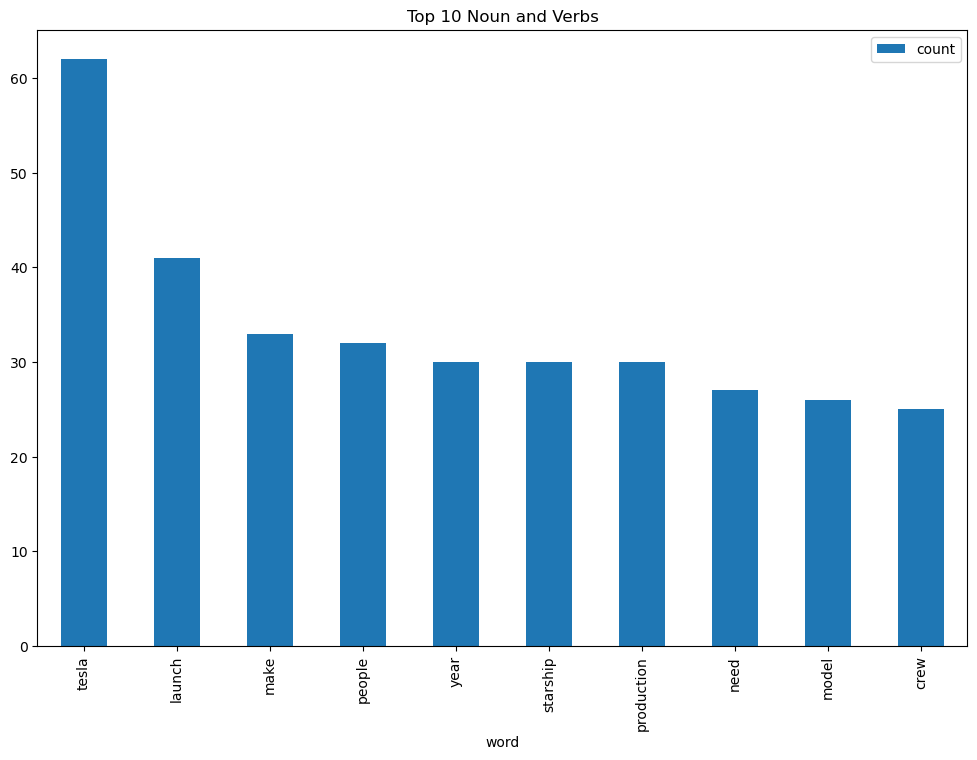

In [67]:
#Visualizing top 10 words by barchart

wf_df[0:10].plot.bar(x='word', figsize=(12,8), title = "Top 10 Noun and Verbs")

<b>Emotion Mining / Sentiment Analysis</b>

In [68]:
tweets

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [69]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(tweets))
sentences

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [70]:
sent_df = pd.DataFrame(sentences, columns=['Sentences'])
sent_df

Sentences
0    @kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1                                   Have you tried it?
2                  @joerogan @Spotify Great interview!
3    @gtera27 Doge is underestimated @teslacn Congr...
4                   Now on to the next for even more!!
..                                                 ...
919  @kenyanwalstreet Not actually a payout, just a...
920  It may never pay out, as the stock cant b
 ht...
921                                    Details Aug 28.
922  AI symbiosis while u wait @vistacruiser7 @flcn...
923  @TeslaGong @PPathole Samwise Gamgee @PPathole ...

[924 rows x 1 columns]

In [71]:
afinn = pd.read_csv("Afinn.csv", encoding= 'latin-1')
afinn

word  value
0       abandon     -2
1     abandoned     -2
2      abandons     -2
3      abducted     -2
4     abduction     -2
...         ...    ...
2472      yucky     -2
2473      yummy      3
2474     zealot     -2
2475    zealots     -2
2476    zealous      2

[2477 rows x 2 columns]

In [72]:
affinity_scores = afinn.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [73]:
#Custom function: score each word in a sentence in lemmatized form, but calculate the score of the whole original sentence.

sentiment_lexion = affinity_scores

def calculate_sentiment(text: str=None):
    sent_score=0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score +=sentiment_lexion.get(word.lemma_, 0)
        return sent_score

In [74]:
#manual testing
calculate_sentiment("Awesome")

4

In [75]:
#Applying it on out tweets
sent_df['sentiment_value'] = sent_df['Sentences'].apply(calculate_sentiment)

In [76]:
sent_df

Sentences  sentiment_value
0    @kunalb11 Im an alien @ID_AA_Carmack Ray trac...                0
1                                   Have you tried it?                0
2                  @joerogan @Spotify Great interview!                3
3    @gtera27 Doge is underestimated @teslacn Congr...                3
4                   Now on to the next for even more!!                0
..                                                 ...              ...
919  @kenyanwalstreet Not actually a payout, just a...                0
920  It may never pay out, as the stock cant b
 ht...               -4
921                                    Details Aug 28.                0
922  AI symbiosis while u wait @vistacruiser7 @flcn...               -2
923  @TeslaGong @PPathole Samwise Gamgee @PPathole ...                0

[924 rows x 2 columns]

In [77]:
sent_df[sent_df.sentiment_value < -5]

Sentences  sentiment_value
64   Also, the road to hell is mostly paved with ba...               -7
647  Very ba
 https://t.co/tJsh1Exz1Q @justpaulinel...               -8
837  Cool Model 3 review by @iamjamiefoxx https://t...               -7

In [78]:
sent_df[sent_df.sentiment_value > 3]

Sentences  sentiment_value
17   Back to work I go @CapybaraSurfer @MattWallace...                4
24   So 
 its finally come to this 
 https://t.co/...                4
30   The Second Last Kingdom https://t.co/Je4EI88Hm...                4
31   - SJM The future currency of Earth @redlineshi...                4
36   @ajtourville @Erdayastronaut @SpaceX Yes, but ...               14
..                                                 ...              ...
898  @EfficiencyLast @jaminwestby @teslaownersSV @j...                4
903  @summergamefest Welcome anytime @bradyleonard ...                7
908                                   DA1 was awesome.                4
909  Mass Effect 2 (talking about sequels) is amazing.                4
915  @burakaydik True Wow, IHOP &amp; GitHub are cl...                7

[152 rows x 2 columns]

In [79]:
sent_df[sent_df.sentiment_value > 7]

Sentences  sentiment_value
36   @ajtourville @Erdayastronaut @SpaceX Yes, but ...               14
42   @thejackbeyer @NASASpaceflight Cryoproof, then...               12
77   <U+0001F5A4> RT @SpaceX: Falcon 9 launches Sta...                9
81   @teslaownersSV This is a good one @MrBeastYT I...               10
102  @BoredElonMusk <U+0001F923><U+0001F923> @erigg...                9
105  @Erdayastronaut @SpaceX Was also thinking that...               16
123  It isnt enough to be safer than human drivers...                9
151  @GUNMTLM3 @lexfridman No, but definitely this ...                9
159  @harsimranbansal @heydave7 It will most likely...               11
183  Theres some great AI out ther
 https://t.co/v...               10
184  Also, w
 https://t.co/IYdKttVsqk @cleantechnic...               12
196  Even reaching apogee wouldve been great, so c...                8
224  @PPathole @karpathy For a second there, I thou...               10
258  @TheOnion @ID_AA_Carmack Yup @flcnhvy Change o...                8
260  Lot of fundamental improvements, both importan...                8
347  https://t.co/uZCGiKciKb @Cardoso Luck is the b...                8
490  Gives a false sense of
 https://t.co/aIGaEnC8f...                9
580  T
 https://t.co/DyNlT5EKGk @Model3Owners Fine,...                8
585  The open areas
 https://t.co/rabjKrtQlw @Sav...               14
594  Doubles as an underground nuclear shelter <U+0...                8
595  @ARKInvest @aurmanARK Good analysis @PPathole ...                9
621  Many exciting things will be unveiled on Batte...                8
645  Its
 https://t.co/IxhyT6NuiC @Teslarati Tesla...               13
652  Its not useful for predicting the future, nor...                9
700  Power
 https://t.co/tSbttIdUHJ @spacecoast_stv...               10
704  New Roadster w
 https://t.co/ukLy4Dwqur @david...                8
719  We just havent observed the
 https://t.co/mez...               17
817  Might be able to
 https://t.co/FB7e5nOq2E @Pri...               11
844  Giving each person money allows them to decid
...                9
855  Impressive Tianwen-1 Mars rover mission launch...               10

In [80]:
 sent_df[sent_df.sentiment_value > 10]

Sentences  sentiment_value
36   @ajtourville @Erdayastronaut @SpaceX Yes, but ...               14
42   @thejackbeyer @NASASpaceflight Cryoproof, then...               12
105  @Erdayastronaut @SpaceX Was also thinking that...               16
159  @harsimranbansal @heydave7 It will most likely...               11
184  Also, w
 https://t.co/IYdKttVsqk @cleantechnic...               12
585  The open areas
 https://t.co/rabjKrtQlw @Sav...               14
645  Its
 https://t.co/IxhyT6NuiC @Teslarati Tesla...               13
719  We just havent observed the
 https://t.co/mez...               17
817  Might be able to
 https://t.co/FB7e5nOq2E @Pri...               11

In [81]:
#how many words are in 1 sentence ?
sent_df['word_count'] = sent_df['Sentences'].str.split().apply(len)
sent_df.head(10)

Sentences  sentiment_value  \
0  @kunalb11 Im an alien @ID_AA_Carmack Ray trac...                0   
1                                 Have you tried it?                0   
2                @joerogan @Spotify Great interview!                3   
3  @gtera27 Doge is underestimated @teslacn Congr...                3   
4                 Now on to the next for even more!!                0   
5                          Happy New Year of the Ox!                0   
6  https://t.co/9WFKMYu2oj Frodo was the underdog...               -2   
7  https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy ...                2   
8  Tweets definitely do not represent real-world ...                0   
9  The most entertaining outcome is the most like...                3   

   word_count  
0          13  
1           4  
2           4  
3          13  
4           8  
5           6  
6          14  
7          10  
8           8  
9         109

In [82]:
sent_df.tail(10)

Sentences  sentiment_value  \
914  That is a revolution in automotive body engine...                0   
915  @burakaydik True Wow, IHOP &amp; GitHub are cl...                7   
916                   @PPathole @IheartTesla For sure.                0   
917               This is both great &amp; terrifying.                3   
918  Everything weve ever sensed or thought has be...                3   
919  @kenyanwalstreet Not actually a payout, just a...                0   
920  It may never pay out, as the stock cant b
 ht...               -4   
921                                    Details Aug 28.                0   
922  AI symbiosis while u wait @vistacruiser7 @flcn...               -2   
923  @TeslaGong @PPathole Samwise Gamgee @PPathole ...                0   

     word_count  
914           9  
915          15  
916           4  
917           6  
918          17  
919          11  
920          31  
921           3  
922          47  
923          15

In [83]:
#sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    924.000000
mean       1.341991
std        2.674856
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       17.000000
Name: sentiment_value, dtype: float64

In [84]:
sent_df[sent_df.sentiment_value < 0]

Sentences  sentiment_value  \
6    https://t.co/9WFKMYu2oj Frodo was the underdog...               -2   
11   However, if we don
 https://t.co/9Z8Ac6skqx @R...               -2   
16                         Thats what youre missing.               -2   
23   https://t.co/UEEocOfcTb The people have spoken...               -3   
47   Would be better to have small fees than no fee...               -2   
..                                                 ...              ...   
886  This is primarily an electrical/electronic (ch...               -2   
887  Will those who write the algorithms ever reali...               -3   
894                      No expert installer required.               -1   
920  It may never pay out, as the stock cant b
 ht...               -4   
922  AI symbiosis while u wait @vistacruiser7 @flcn...               -2   

     word_count  
6            14  
11           40  
16            4  
23           37  
47           48  
..          ...  
886          69  
887          11  
894           4  
920          31  
922          47  

[110 rows x 3 columns]

In [85]:
#reseting indexes
sent_df['index']=range(0,len(sent_df))
sent_df

Sentences  sentiment_value  \
0    @kunalb11 Im an alien @ID_AA_Carmack Ray trac...                0   
1                                   Have you tried it?                0   
2                  @joerogan @Spotify Great interview!                3   
3    @gtera27 Doge is underestimated @teslacn Congr...                3   
4                   Now on to the next for even more!!                0   
..                                                 ...              ...   
919  @kenyanwalstreet Not actually a payout, just a...                0   
920  It may never pay out, as the stock cant b
 ht...               -4   
921                                    Details Aug 28.                0   
922  AI symbiosis while u wait @vistacruiser7 @flcn...               -2   
923  @TeslaGong @PPathole Samwise Gamgee @PPathole ...                0   

     word_count  index  
0            13      0  
1             4      1  
2             4      2  
3            13      3  
4             8      4  
..          ...    ...  
919          11    919  
920          31    920  
921           3    921  
922          47    922  
923          15    923  

[924 rows x 4 columns]

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

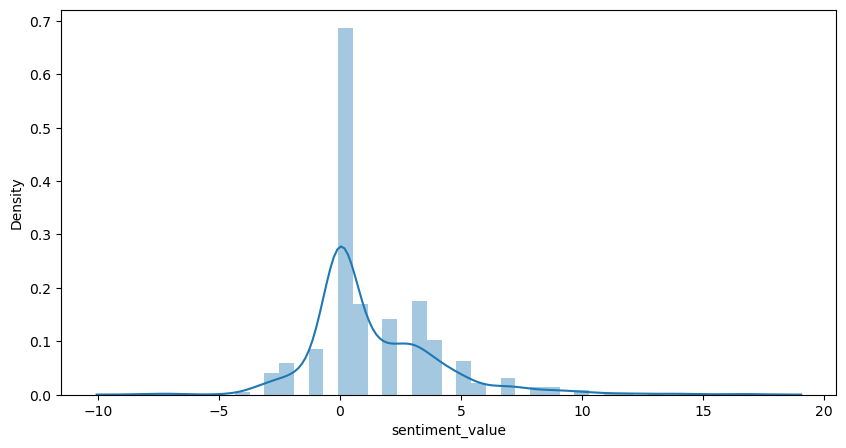

In [86]:
#visulalizing
plt.figure(figsize=(10,5))
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

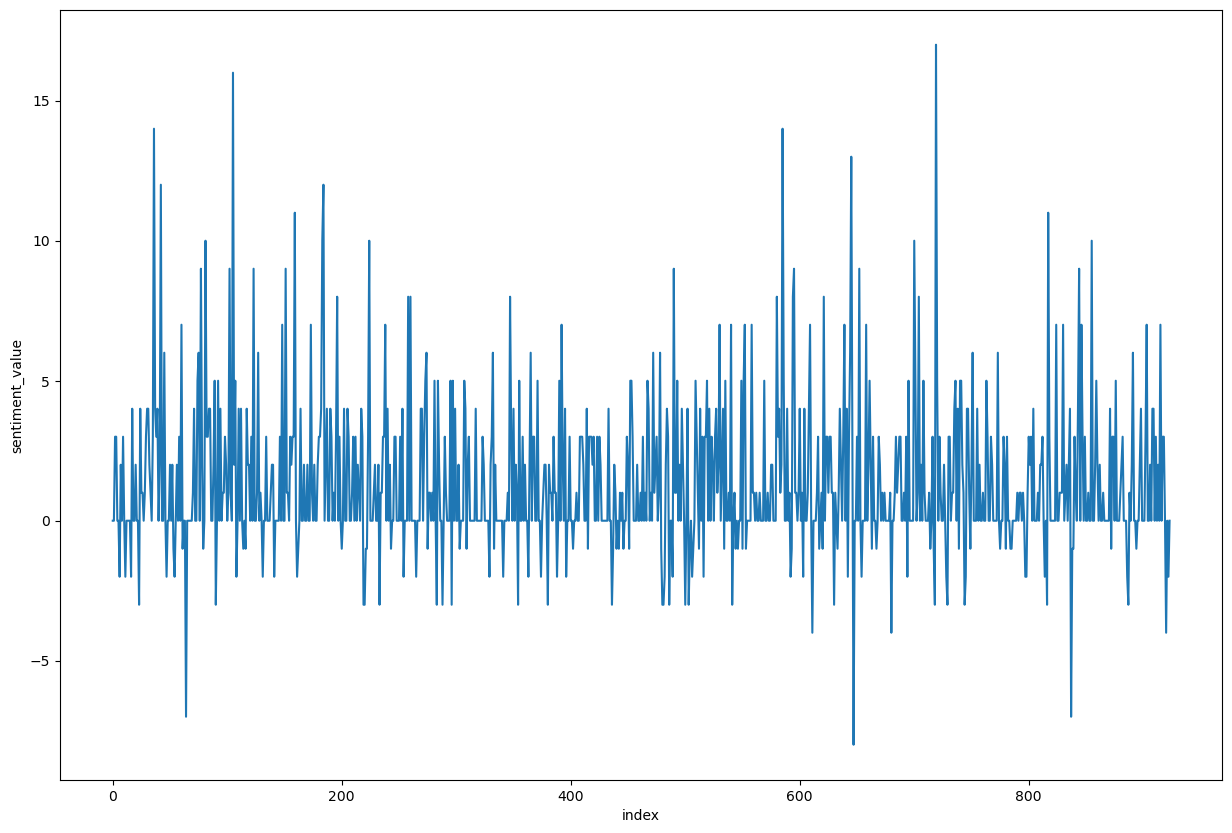

In [87]:
plt.figure(figsize=(15,10))
sns.lineplot(x='index', y='sentiment_value', data=sent_df)

<AxesSubplot:title={'center':'Sentiment Values to Word Count'}, xlabel='word_count', ylabel='sentiment_value'>

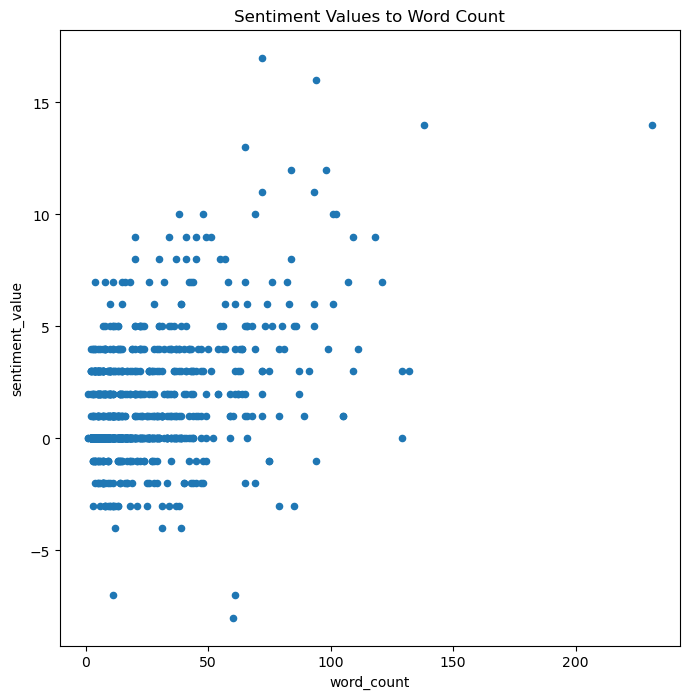

In [88]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title="Sentiment Values to Word Count")